In [268]:
using DrWatson
@quickactivate "wrips-code"

In [269]:
using ProgressBars, Suppressor, Pipe, Revise
using Plots, RCall, Statistics
using Ripserer, PersistenceDiagrams, PersistenceDiagramsBase

In [270]:
include(srcdir("wRips.jl"))
import Main.wRips
plot_par = wRips.plot_params(alpha = 0.3);
theme(:dao)

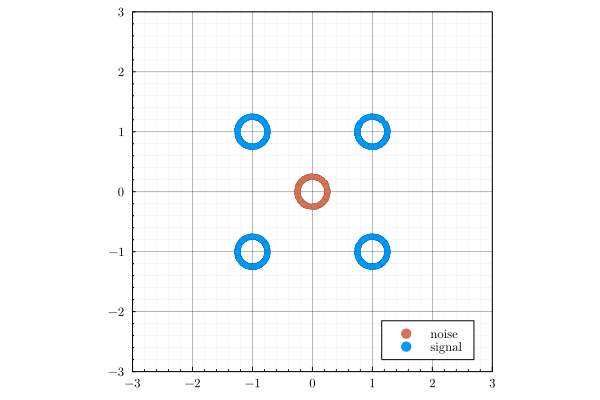

In [271]:
n = 200
m = 150
X1 = @pipe 0.25 .* wRips.randCircle(n) |> map(x -> x .+ (-1.0, -1.0), _)
X2 = @pipe 0.25 .* wRips.randCircle(n) |> map(x -> x .+ (-1.0, +1.0), _)
X3 = @pipe 0.25 .* wRips.randCircle(n) |> map(x -> x .+ (+1.0, -1.0), _)
X4 = @pipe 0.25 .* wRips.randCircle(n) |> map(x -> x .+ (+1.0, +1.0), _)
X5 = @pipe 0.25 .* wRips.randCircle(m) |> map(x -> x .+ (+0.0, +0.0), _)

labels = [ repeat(["signal"], 4*n); repeat(["noise"], m)  ]
Xnt = [X1; X2; X3; X4; X5]
Xn = Xnt |> wRips._ArrayOfTuples_to_ArrayOfVectors
@pipe Xnt |> scatter(_, ratio=1, lim=(-3,3), groups=labels, legend=:bottomright)

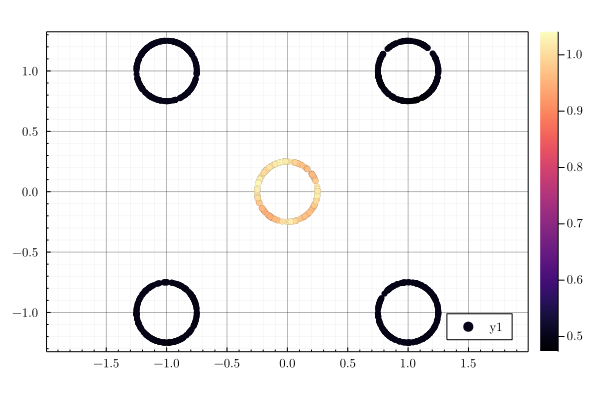

In [274]:
Q = 2 * m + 1
DnQ = wRips.momdist(Xn, Q)
w = wRips.fit(Xn, DnQ)
@pipe Xnt |> scatter(_, ratio = 1, marker_z = w, legend = :bottomright)

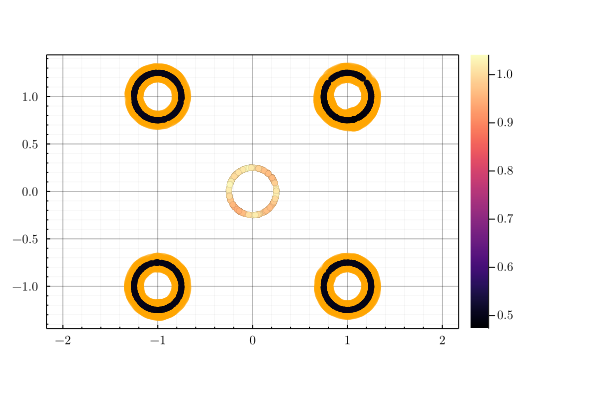

In [275]:
t = 0.6
wRips.filtration_plot(t; Xn = Xn, w = w, p = 1, par = plot_par)

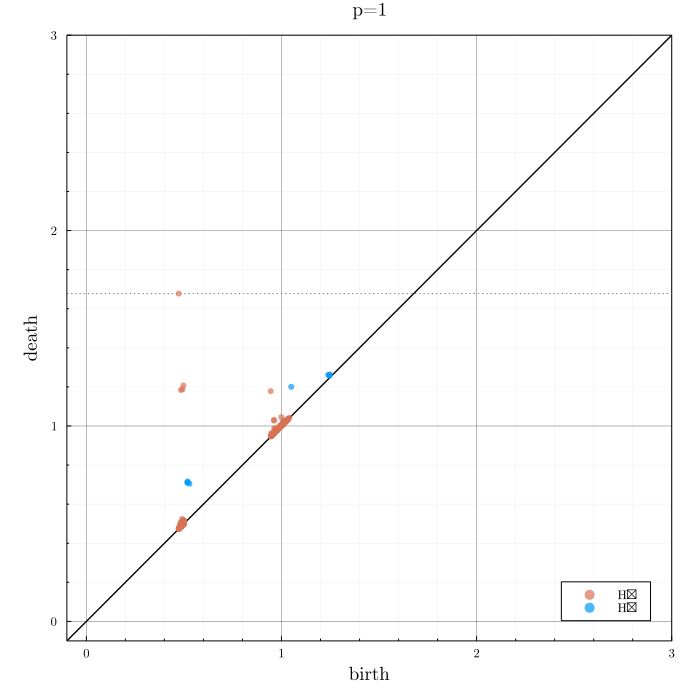

In [278]:
DnQ = wRips.wrips(Xn, w = w, p = 1, reps=true, dim_max=1)    
@suppress plot(DnQ, lim = (-0.1, 3), title = "p=1", markeralpha=0.7, size=(700,700)) |> display

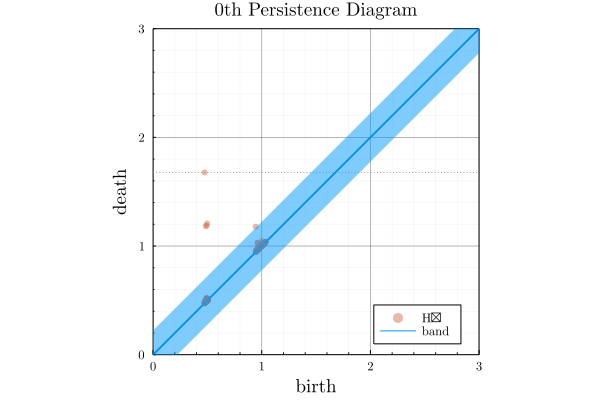

In [279]:
plt_dgm1 = plot(DnQ[1], lim=(0, 3), title="0th Persistence Diagram")
@suppress plot(plt_dgm1, 0:0.1:3, x->x, ribbon=persistence(DnQ[1][end-4]) - 0.01, label="band") |> display

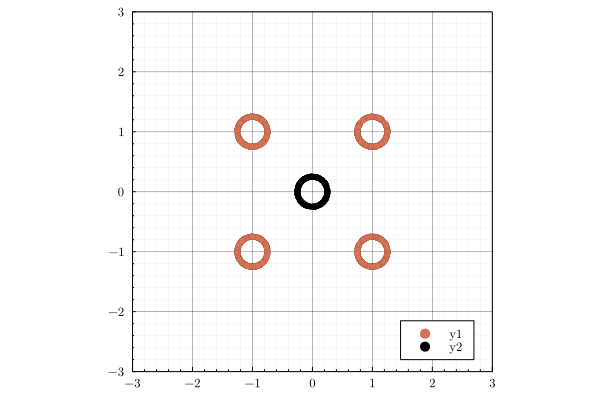

In [280]:
temp = @pipe DnQ[1][end-4] |> Ripserer.representative .|> Ripserer.vertices |> map(x -> [x...], _) |> wRips._ArrayOfTuples_to_Matrix |> unique
plt = @pipe Xnt |> scatter(_, lim = (-3, 3), ratio = 1)
scatter(plt, Xnt[temp], c = :black, legend=:bottomright)